# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Below, we created a plot with a clearly non-linear shape.

- plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree.
- print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

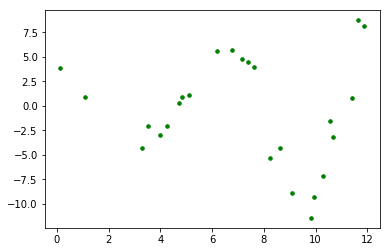

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

## Solution

degree 2 0.06253000970092093
degree 3 0.8878794775457156
degree 4 0.8762344949236187


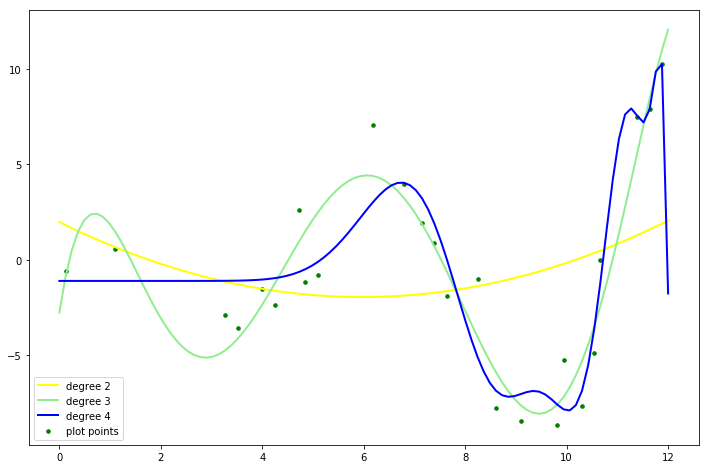

In [2]:
## your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

x_plot = np.linspace(0, 12, 100)

# reshape the arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(12,8))
plt.scatter(x, y, color='green', s=50, marker='.', label="plot points")

for index, degree in enumerate([1,2,3,4]):
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(X)
    X_plot = poly.fit_transform(X_plot)
    reg_poly = LinearRegression().fit(X, y)
    y_plot = reg_poly.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[index], linewidth = 2 ,
             label="degree %d" % degree)
    print("degree %d" % degree, r2_score(y, reg_poly.predict(X)))

plt.legend(loc='lower left')
plt.show();

In [ ]:
# Degree 3 proves to be the best polynomial regression with an r-squared value of 0.888. Degree 4 was only slightly
# beat out by Degree 3 while Degree 2 only presented an r-squared of 0.063.

## Summary

Great! You now know how to include polynomials in your linear model!